<a href="https://colab.research.google.com/github/cornelius152/Text-Classification---Data-Science-Internship/blob/main/Classified_Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Data**

In [3]:
# Importing data: excel sheet with only relevant columns, as original datafile contained unnecessary columns
data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/categorized_questions.xlsx')

In [4]:
data.head(3)

,Topic,Question,Variable
0,Age Group,Age Group,NaN
1,Gender,Gender,NaN
2,Life Impact,When thinking about your discomforts from cons...,NaN


# **Exploratory Analysis**

Things we need to know:
1. Total number of distinct or unique topics, questions and variables
2. Total number of distinct questions and variables per topic
3. Visual representation of distribution
4. Wordcloud of all the words in the dataset, minus stopwords and punctuation
5. Can we make any assumptions on whether we need more classified data?
6. How about train/test split strategy?

## Total number of distinct or unique topics, questions and variables

In [5]:
# Total number of distinct or unique questions in 'Question' and 'Variable' columns

# Building a function that counts the unique number of samples in a column or feature by creating a list of unique samples
def feature_counter(column):
    count = 0
    unique = []

    for i in range(len(data)):
        if data[column][i] not in unique:
            unique.append(data[column][i])
            count += 1
        else:
            pass
        
    print(f'{column}: {count}')

feature_counter('Topic')
feature_counter('Question')
feature_counter('Variable')

Topic: 16
Question: 61
Variable: 139


## Total number of distinct questions and variables per topic

In [6]:
# Total number of distinct questions and variables in each topic
# First creating an empty dictionary where I will store all the topics; all key values will be lists, which will hold every distinct...
# question and variable; we will then count the number of unique items in each list to get the counts
def topic_dist_counter(column):
    dic = {}

    for i in range(len(data)):
        if data['Topic'][i] not in dic:
            dic[data['Topic'][i]] = []
        if data[column][i] not in dic[data['Topic'][i]]:
            dic[data['Topic'][i]].append(data[column][i])
            
    counts = []
    
    for i in dic:
        counts.append(len(dic[i]))
        print(f'{i}: {len(dic[i])}')
        
# Building plots to show these distributions    
    color = '#86C6E5'
    plt.bar(dic.keys(), counts, color=color)
    plt.xticks(rotation=90)
    plt.title(f"Topic Counts for Classified Data {column}s")
    plt.xlabel("Topic")
    plt.ylabel(f'{column} Count')
    plt.show()
        
    print()

## Visual representation of distribution

Age Group: 1
Gender: 2
Life Impact: 3
Diagnosis: 1
Symptoms: 5
Remedies: 17
Region: 1
Education: 1
Occupation: 1
Household Income: 1
Oral Health Attitudes: 1
Oral Product U&A: 3
Dental Problems: 2
Oral Product Ingredients: 18
Digestive Health Diagnosis: 1
Causes: 3


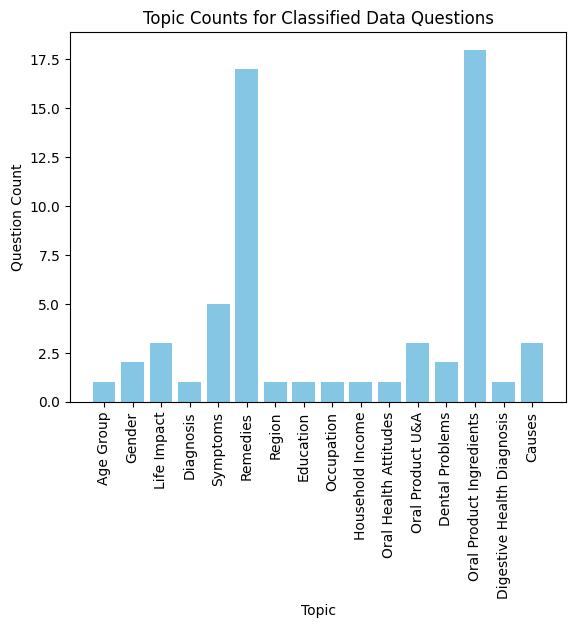

In [7]:
topic_dist_counter('Question')

Age Group: 1
Gender: 1
Life Impact: 12
Diagnosis: 12
Symptoms: 19
Remedies: 52
Region: 1
Education: 1
Occupation: 1
Household Income: 1
Oral Health Attitudes: 1
Oral Product U&A: 32
Dental Problems: 10
Oral Product Ingredients: 44
Digestive Health Diagnosis: 13
Causes: 11


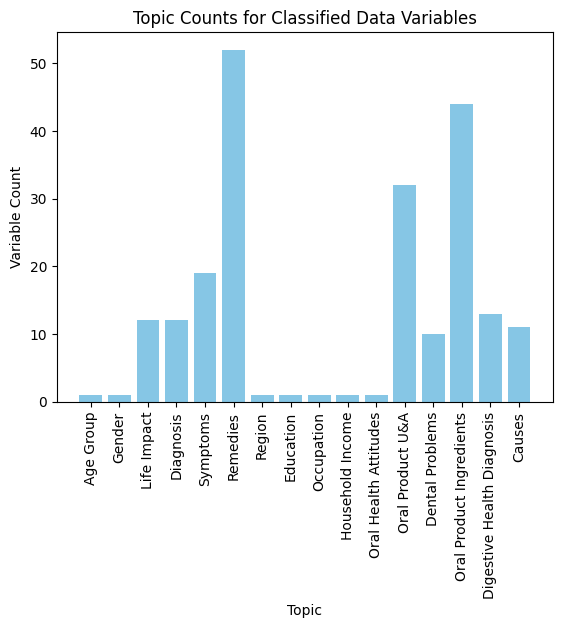

In [8]:
topic_dist_counter('Variable')

In [9]:
# Getting all the unique questions
unique_classified_data = data.drop_duplicates(subset='Question', keep='first', ignore_index=True)

In [10]:
print(len(unique_classified_data))

61


In [11]:
# Downloading dataset as csv
# unique_classified_data.to_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/unique_classified_questions.csv', index=False)

# **WordCloud**

In [12]:
# Wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# Importing wordcloud as well as stopwords
from wordcloud import WordCloud, STOPWORDS

In [14]:
# Importing string library which will allow us to manipulate strings
import string

# Creating a list of separate words from EVERY question to use in wordcloud
words = []

# Running a for loop to split each question into distinct words and add those words into my words list
for i in data['Question']:
    for j in i.split():
        words.append(j)

# Simple preprocessing:
# Removing stopwords from words list
stopwords = sorted(STOPWORDS)

for i in words:
    if i in stopwords:
        words.remove(i)

# Removing punctuation, by converting list of words to a string of words and searching through it for punctuation
string_words = str(words).translate(str.maketrans('', '', string.punctuation))

# print(string_words)

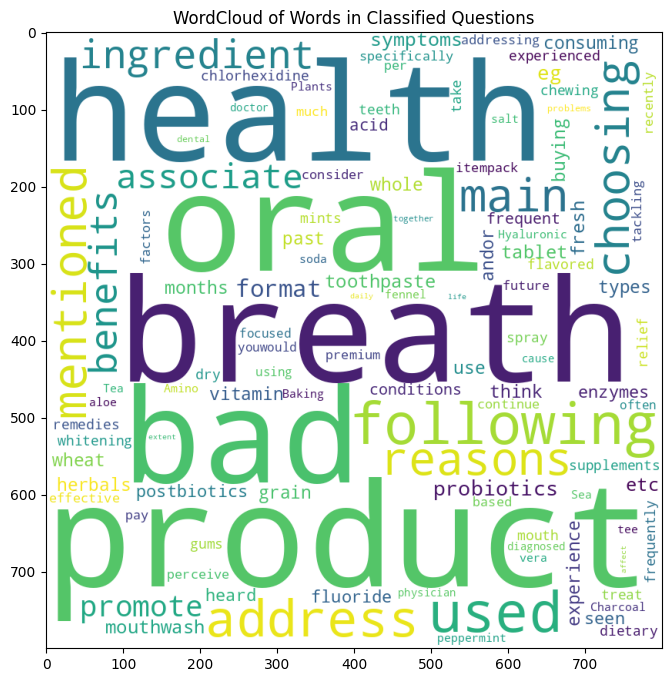

In [15]:
# Generating and plotting wordcloud for words in 'questions' column
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                min_font_size = 10).generate(string_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.title('WordCloud of Words in Classified Questions')
plt.imshow(wordcloud)

### Can we make any assumptions on whether we need more classified data?

I think we will need more classified data, as there are only 61 unique questions and 138 (139 - 1(NaN)) variables, and the distribution of number of questions in each topic is not even. And from the wordcloud we have a visual representation that shows us that oral- and breath-related questions are the most prevalent.

I can also append the variable to the question, which will create a greater number of distinct questions, but I'm not sure how important those words are for categorization.

### With so few samples, how do I plan to split the training and test set?

My initial strategy was to take 80% of questions from each topic for training and the other 20% for test, but the uneven distribution of samples per topic may make it difficult for training.

### Next steps?

Can we get more classified data? Otherwise, I can go ahead and start building the model, train on what we have, and then add more data when we can get it?